In [ ]:
!pip install geopandas

In [7]:
import geopandas as gpd
import pandas as pd
import shapely.wkt

import os
# os.environ['SHAPE_RESTORE_SHX'] = 'YES'

# Read the shapefile
gdf = gpd.read_file("/content/hotosm_lka_railways_lines.shp")

# Print the first few rows of the GeoDataFrame
lon=[]
lat=[]
# gdf['geometry']

In [34]:
import pandas as pd
df = pd.DataFrame(columns=['lat', 'lon'])

In [35]:


for i in range(len(gdf)):
  geo=list(gdf.iat[i,0].coords)
  for val in geo:
     df = df.append({'lat':val[1], 'lon':val[0]}, ignore_index=True)




In [44]:
df.head()

,lat,lon
0,6.041941,80.217519
1,6.041890,80.217440
2,6.041715,80.217045
3,6.041141,80.216073
4,6.040748,80.215435


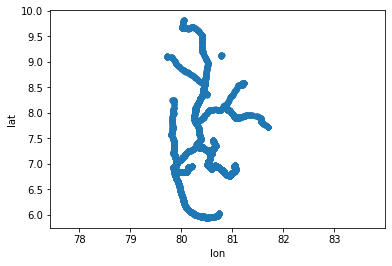

In [38]:
import matplotlib.pyplot as plt

ax =df.plot(kind='scatter', x='lon', y='lat')
ax.axis('equal')
plt.show()

In [49]:
df.to_csv('trainPaths.csv', index=False)

In [50]:
import geopy.distance

coords_1 = (6.041941,80.217519)
coords_2 = (6.041890,80.217440)

print( geopy.distance.geodesic(coords_1, coords_2).km)

0.010406543679496281


In [48]:
from math import sin, cos, sqrt, atan2, radians

# Approximate radius of earth in km
R = 6373.0

lat1 = radians(6.041941)
lon1 = radians(80.217519)
lat2 = radians(6.041890)
lon2 = radians(80.217440)

dlon = lon2 - lon1
dlat = lat2 - lat1

a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
c = 2 * atan2(sqrt(a), sqrt(1 - a))

distance = R * c

print("Result: ", distance)
print("Should be: ", 278.546, "km")

Result:  0.010418178945347507
Should be:  278.546 km
